## Configure osmnx and import things

In [1]:
import osmnx as ox
ox.config(log_console = True, data_folder = 'data')
graph = ox.load_graphml('nerails_simplified.graphml')

In [2]:
import numpy as np
import networkx as nx
import scipy.sparse
import scipy.sparse.csgraph
import pandas as pd
import collections
import matplotlib.pyplot as plt

## Degree histogram

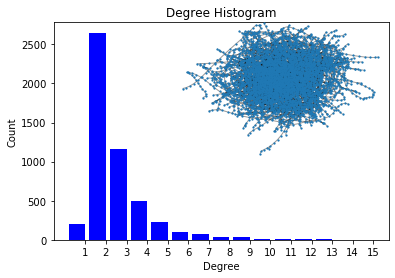

In [5]:
G = graph.to_undirected()

# https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = graph.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=1.5)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()